In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
img_array = []
for i in range(0,360,5):
    img = cv.imread(r'C:\Users\Murali\Desktop\Mtech\Sem2\ComputerVision\paper\COIL\coil-100\coil-100\obj1__'+str(i)+'.png')
    assert img is not None, "file could not be read, check with os.path.exists()"
    mask = np.zeros(img.shape[:2],np.uint8)
    bgdModel = np.zeros((1,65),np.float64)
    fgdModel = np.zeros((1,65),np.float64)
    rect = (0,40,470,300)
    cv.grabCut(img,mask,rect,bgdModel,fgdModel,5,cv.GC_INIT_WITH_RECT)
    mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')
    img = img*mask2[:,:,np.newaxis]
    img_array.append(img)
# plt.imshow(img),plt.colorbar(),plt.show()

In [ ]:
first_image = cv.imread(r'C:\Users\Murali\Desktop\Mtech\Sem2\ComputerVision\paper\COIL\coil-100\coil-100\obj1__190.png')

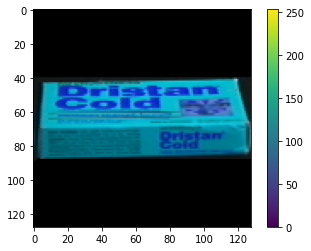

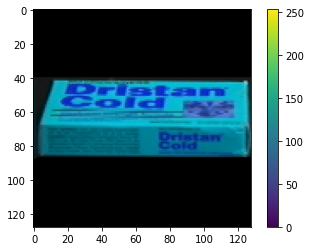

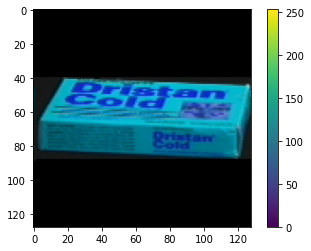

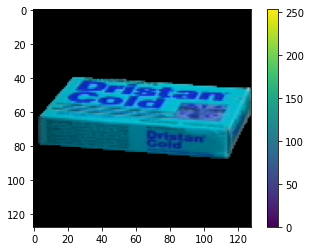

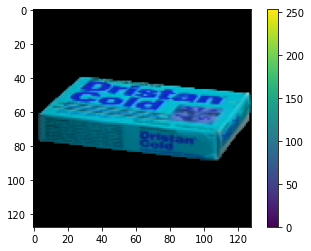

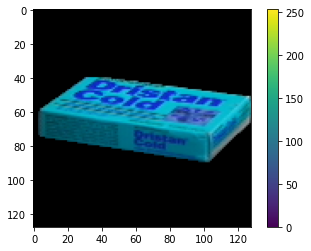

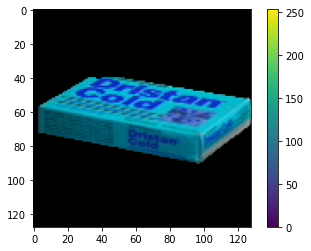

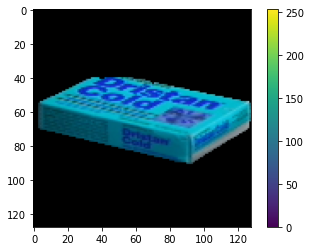

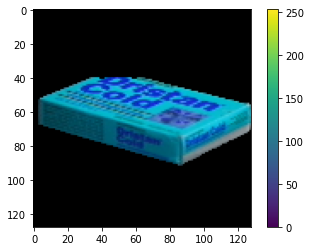

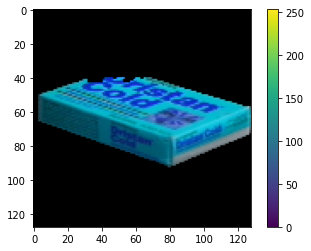

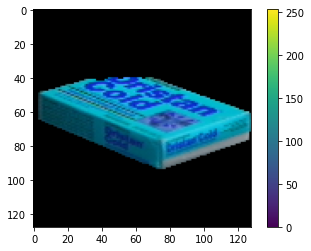

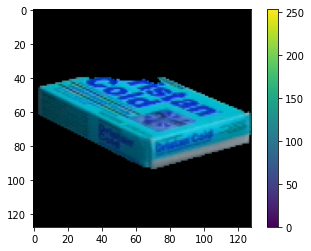

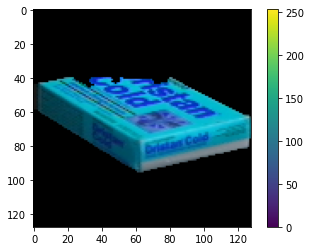

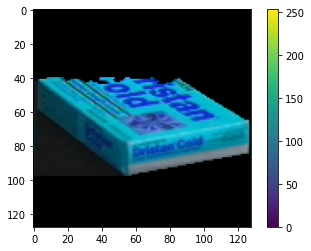

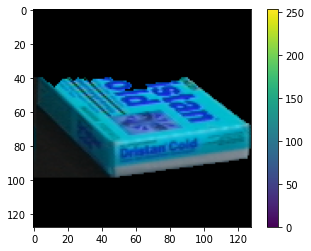

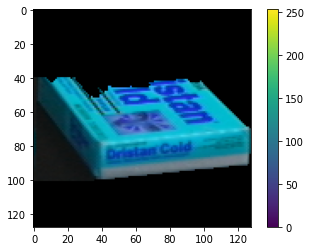

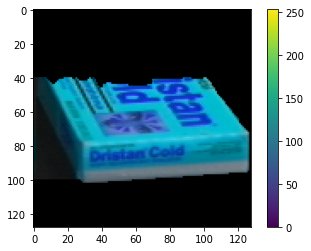

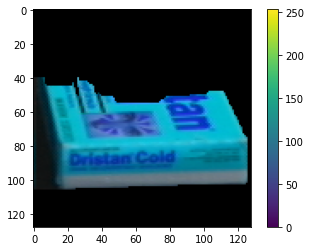

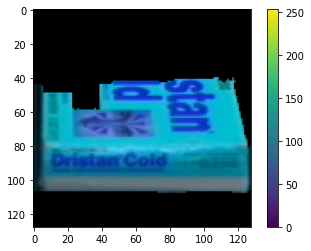

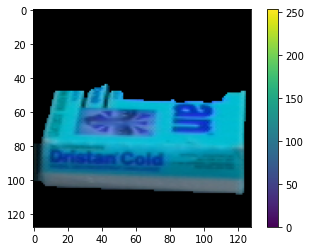

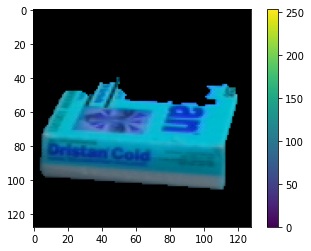

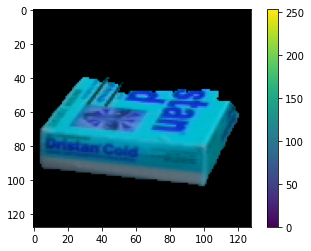

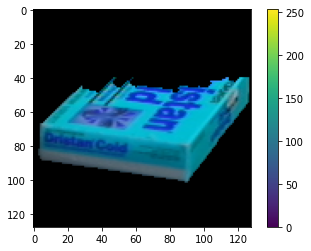

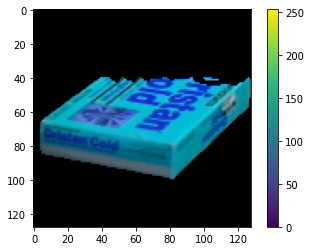

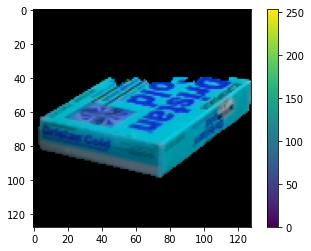

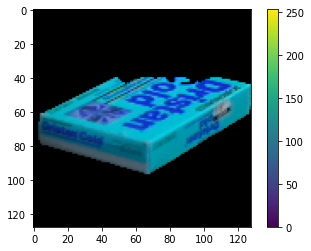

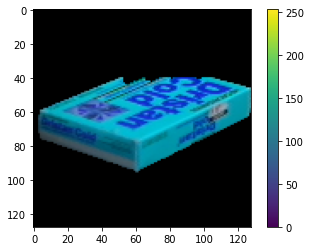

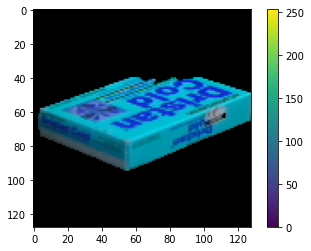

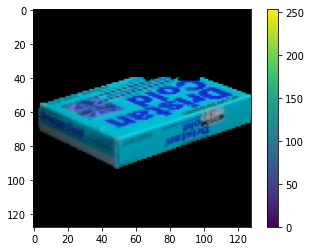

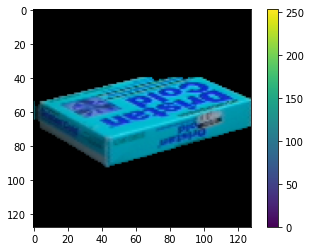

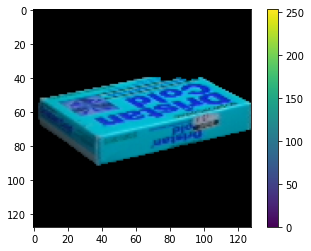

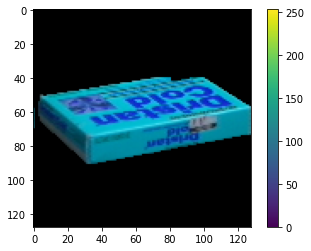

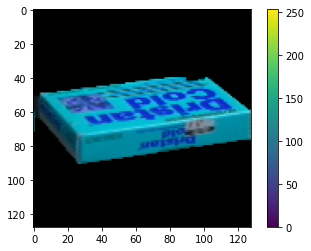

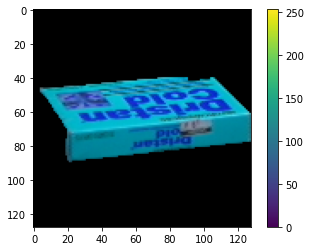

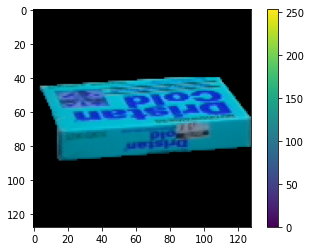

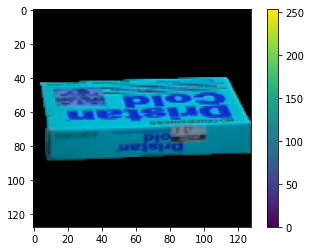

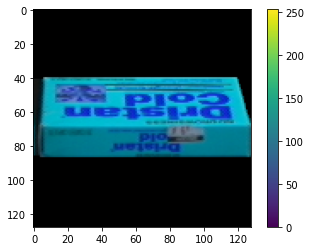

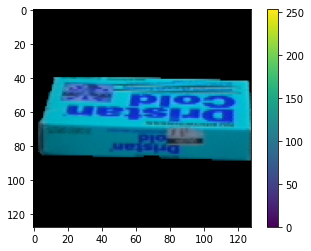

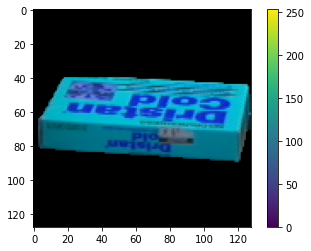

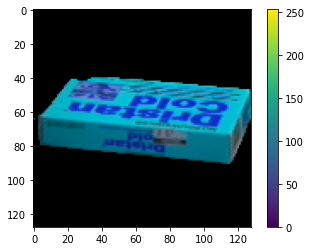

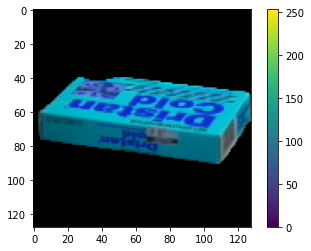

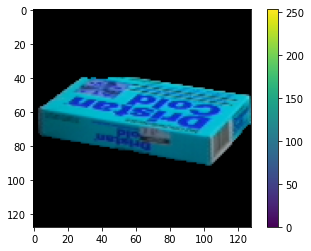

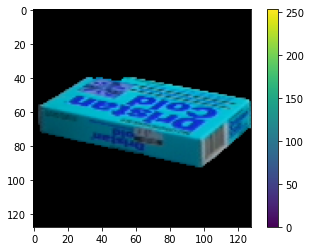

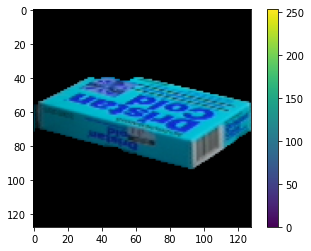

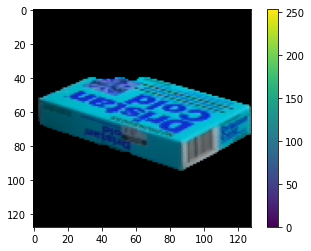

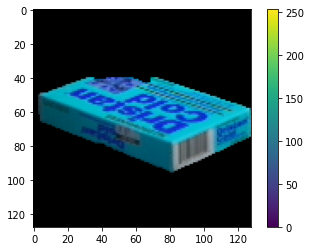

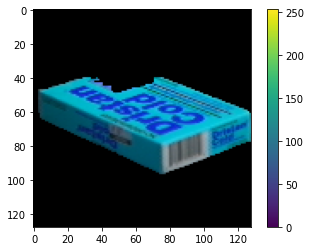

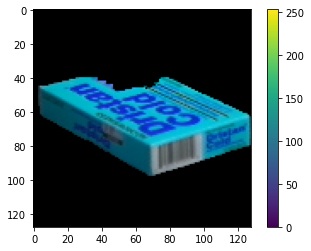

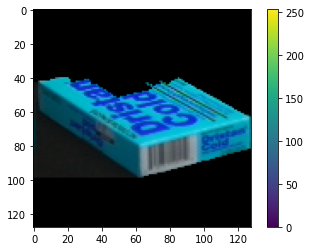

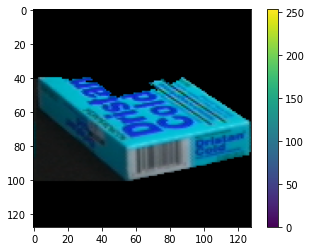

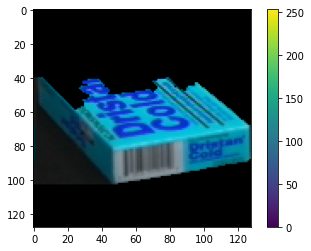

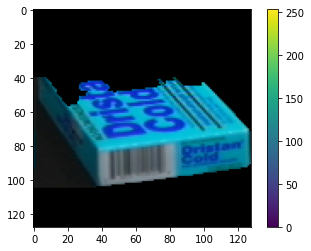

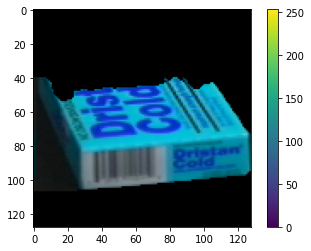

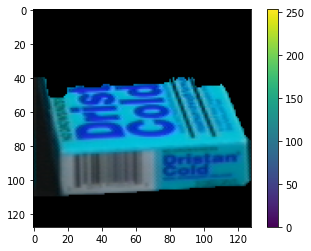

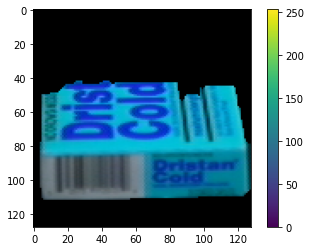

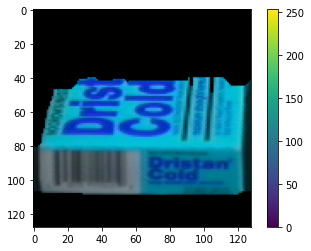

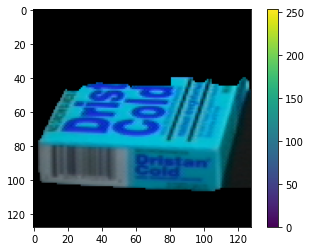

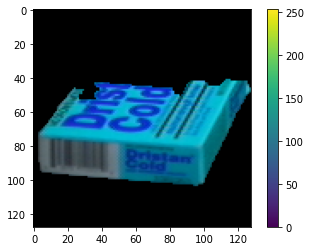

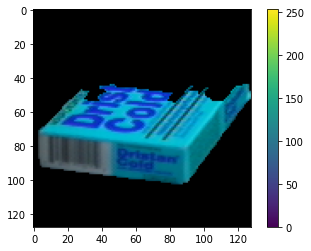

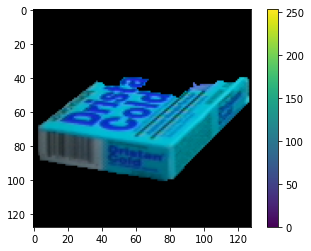

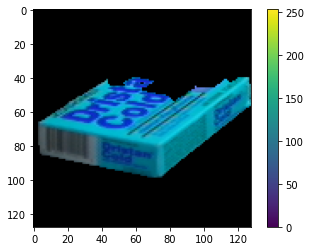

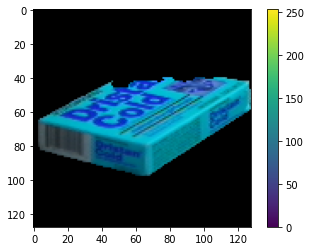

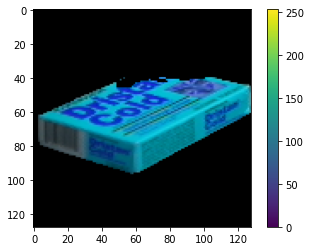

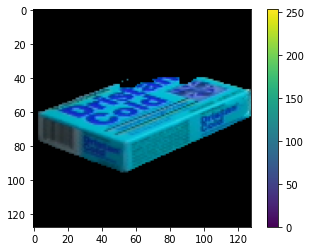

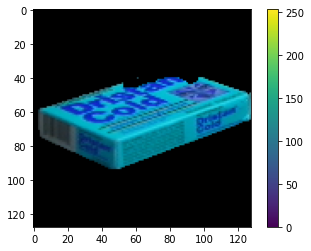

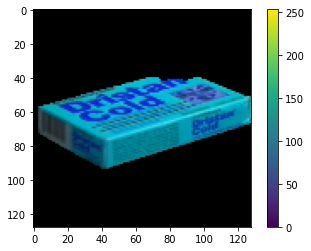

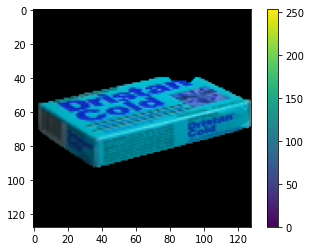

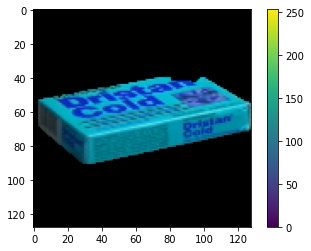

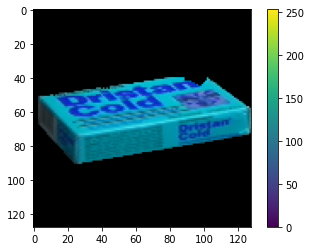

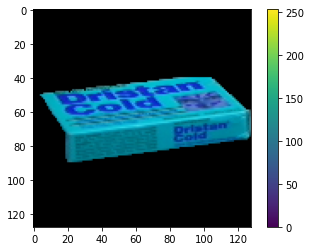

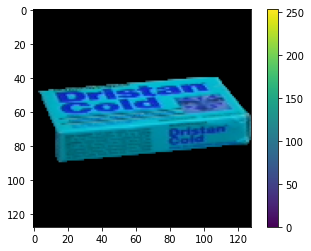

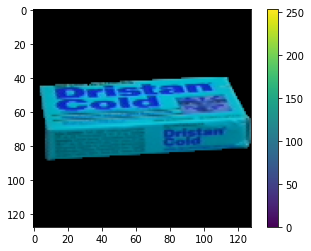

In [2]:
for img in img_array:
    plt.imshow(img),plt.colorbar(),plt.show()

In [3]:
im1 = img_array[0]
im2 = img_array[10]

im1_gray = cv.cvtColor(im1,cv.COLOR_BGR2GRAY)
im2_gray = cv.cvtColor(im2,cv.COLOR_BGR2GRAY)

sz = im1.shape

warp_mode = cv.MOTION_TRANSLATION

if warp_mode == cv.MOTION_HOMOGRAPHY :
    warp_matrix = np.eye(3, 3, dtype=np.float32)
else :
    warp_matrix = np.eye(2, 3, dtype=np.float32)
    
number_of_iterations = 5000;

termination_eps = 1e-10;

criteria = (cv.TERM_CRITERIA_EPS | cv.TERM_CRITERIA_COUNT, number_of_iterations,  termination_eps)

(cc, warp_matrix) = cv.findTransformECC (im1_gray,im2_gray,warp_matrix, warp_mode, criteria)
 
if warp_mode == cv.MOTION_HOMOGRAPHY :
    im2_aligned = cv.warpPerspective (im2, warp_matrix, (sz[1],sz[0]), flags=cv.INTER_LINEAR + cv.WARP_INVERSE_MAP)
else:
    im2_aligned = cv.warpAffine(im2, warp_matrix, (sz[1],sz[0]), flags=cv.INTER_LINEAR + cv.WARP_INVERSE_MAP)

print("Correlation coefficient:",cc)    
    
# cv.imshow("Image 1", im1)
# cv.imshow("Image 2", im2)
# cv.imshow("Aligned Image 2", im2_aligned)
# cv.imshow("Testing",img_array[0])
# cv.waitKey(0)

# print(im2_aligned)

Correlation coefficient: 0.7925103610643635


In [5]:
tiles1 = [im1[x:x+32,y:y+32] for x in range(0,im1.shape[0],32) for y in range(0,im1.shape[1],32)]
tiles2 = [im2[x:x+32,y:y+32] for x in range(0,im2.shape[0],32) for y in range(0,im2.shape[1],32)]

In [9]:
#DWT-LL1
import pywt
dwt1 = []
for t1 in tiles1:
    coeffs = pywt.wavedec(t1, 'db1')
    dwt1.append(t1)
    
dwt1

[array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        ...,
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]]], dtype=uint8),
 array([[[0, 0, 0],
         [0, 0, 0],
         [0, 0, 0],
         ...,
         [0, 0, 0],
         [0, 0, 0],
         [0, 0, 0]],
 
        [[0, 

In [10]:
for f in dwt1:
    cv.imshow("Feature", f)
    cv.waitKey(0)

In [ ]:
#ACO
